
# <span style="color:rgb(213,80,0)">Wool data.</span>

This file creates Figures 4.5-4.8.

## Beginning of code.

In [1]:
clear
close all
load('wool.txt','wool');
y=wool(:,4);
X=wool(:,1:3);
prin=0;

## Create Figure 4.5

Dtails of the outlier detection procedure based on FS


In [2]:
[out]=FSR(y,X,'plots',0,'nsamp',0);

------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=17 because
rmin(17,27)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=16
Superimposition stopped because r_{min}(17,19)>99% envelope
 !!!EQ_1!!! \% envelope
Subsample of 18 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=9
Summary of the exceedances
           1          99         999        9999       99999
           1           3           3           3           2


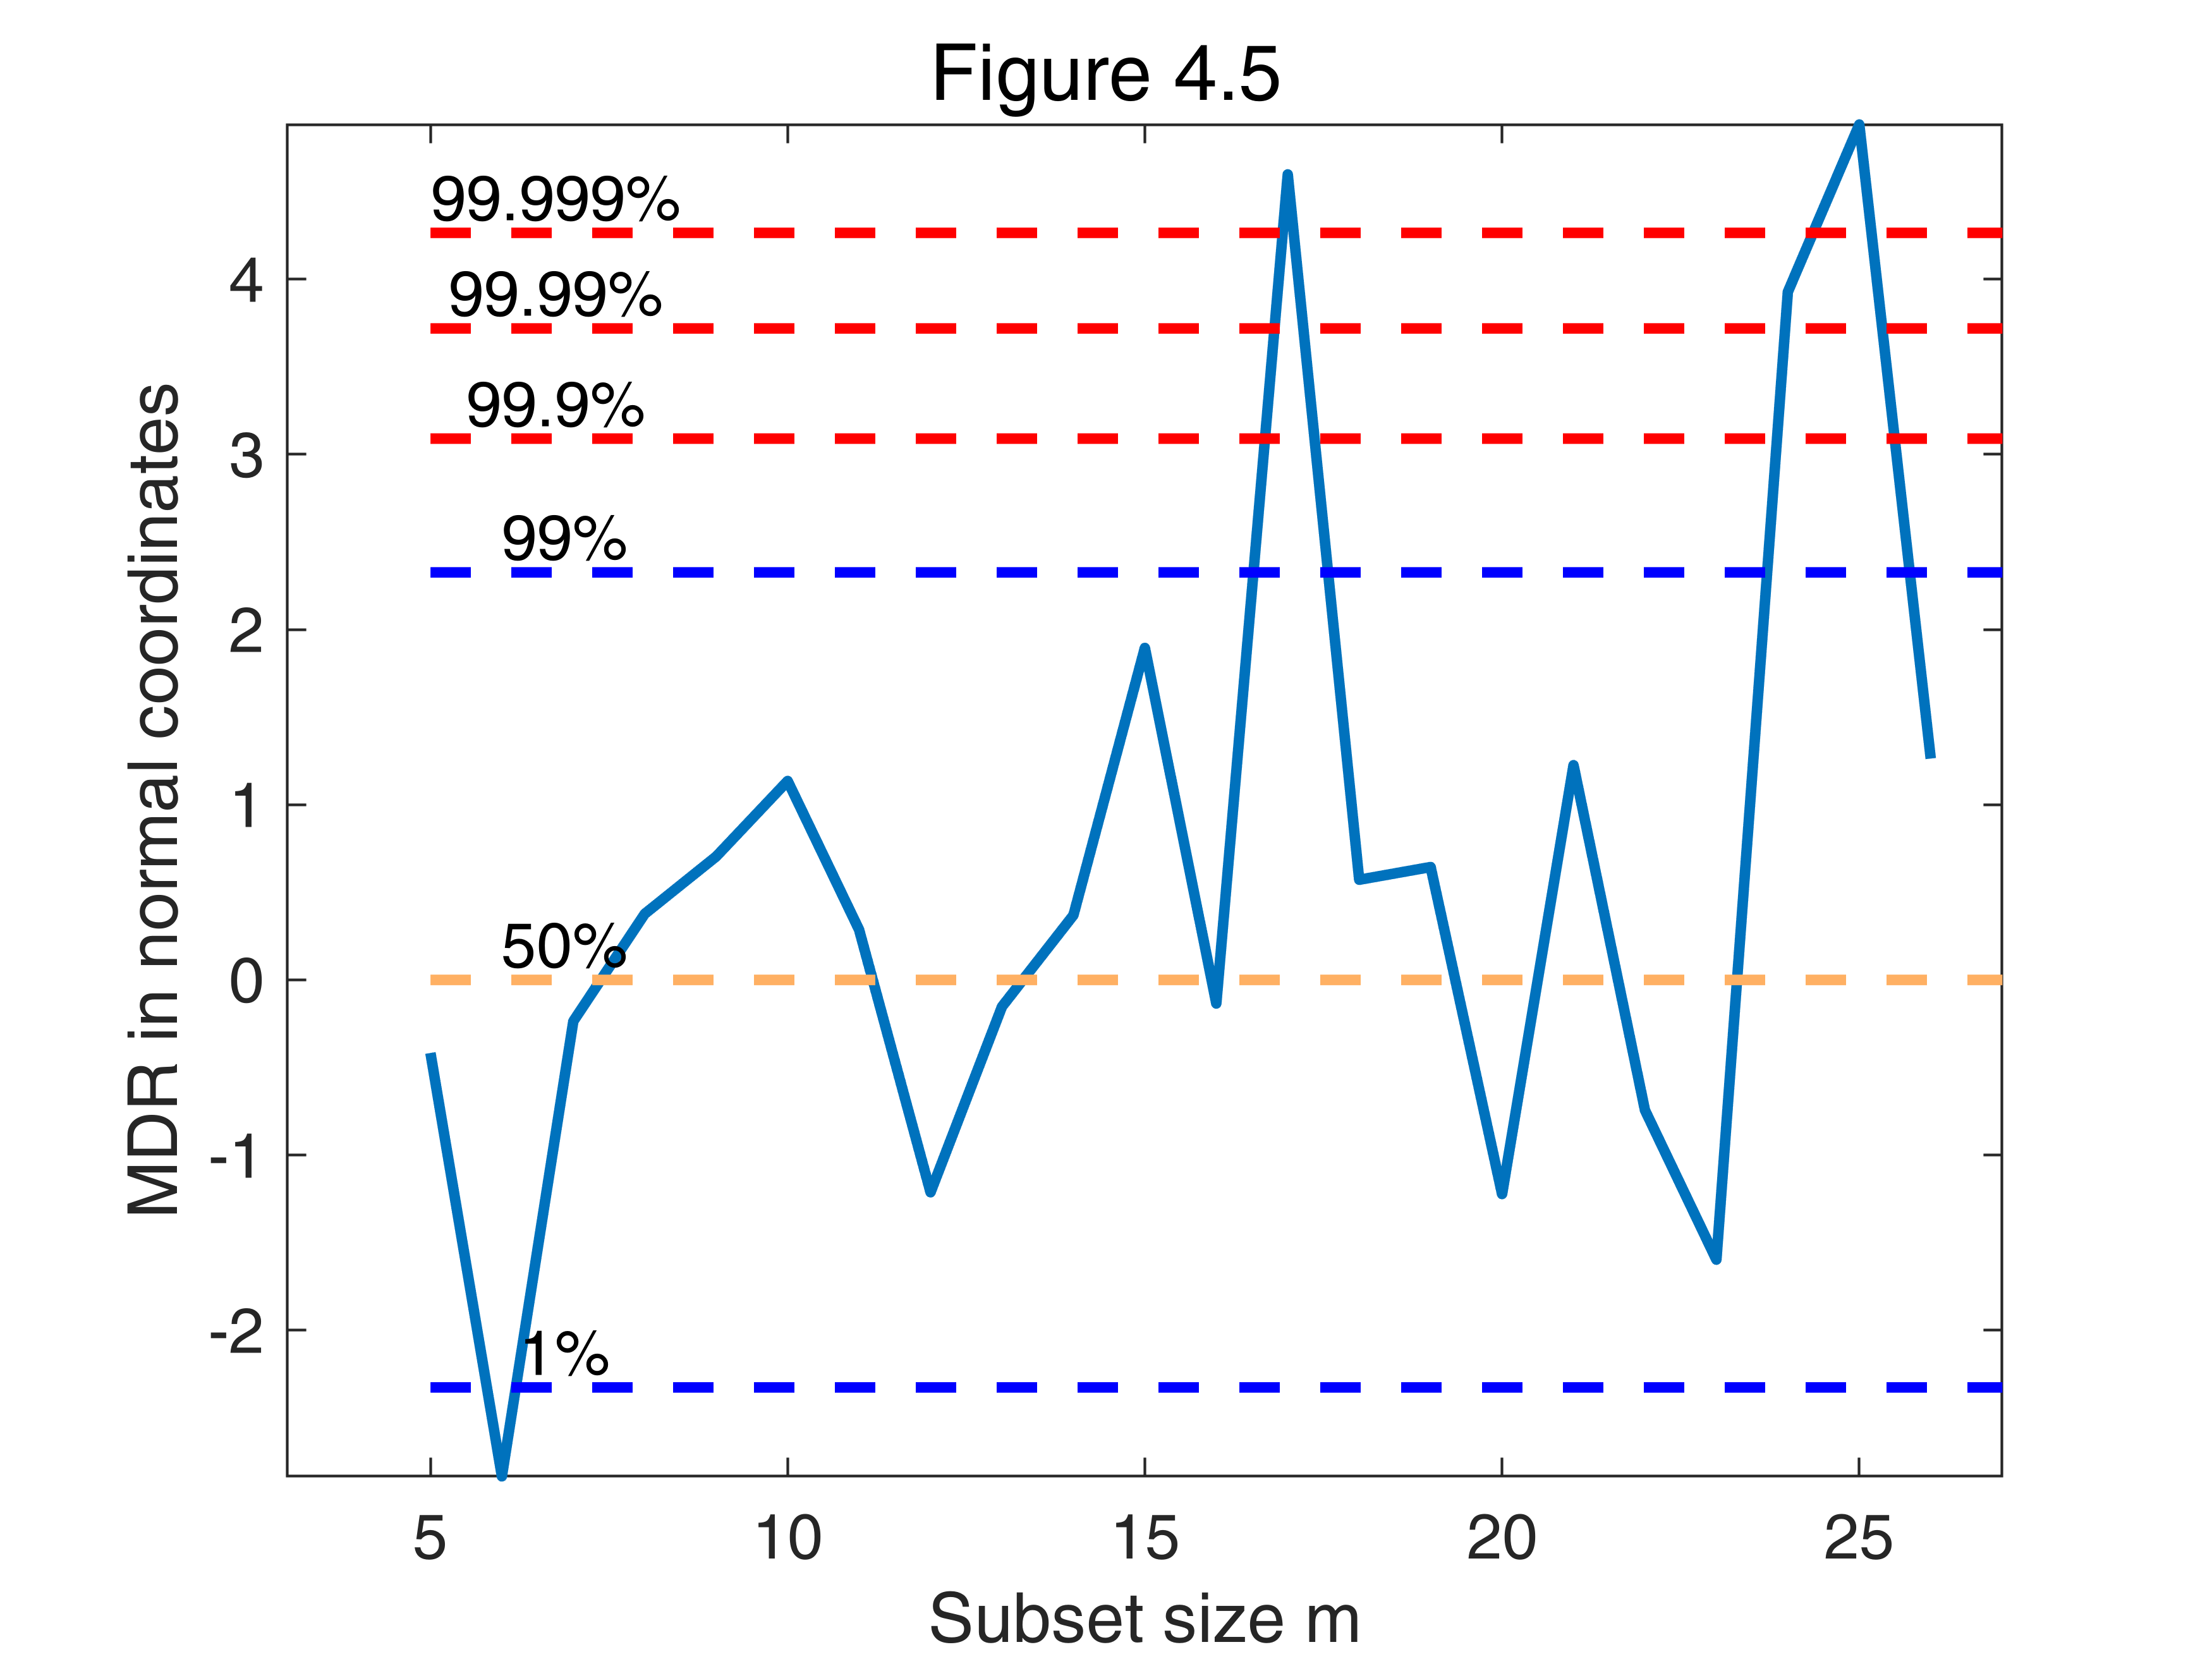

In [3]:

plots=struct;
plots.conflev=[0.01 0.5 0.99 0.999 0.9999 0.99999];
plots.LineWidth=2;
plots.LineWidthEnv=2;
plots.Tag='ploriy';
MDRinv=FSRinvmdr(out.mdr,size(X,2)+1,'plots',plots);
xlim([3 length(y)])

if prin==1
    % print to postscript
    print -depsc figs\WDdetailsNC.eps;
end

sgtitle('Figure 4.5')
set(gcf,"Name",'Figure 4.5')

## Create Figure 4.6

Comparison of resuperimposing envelopes using mdr in normal coordinates at particular steps



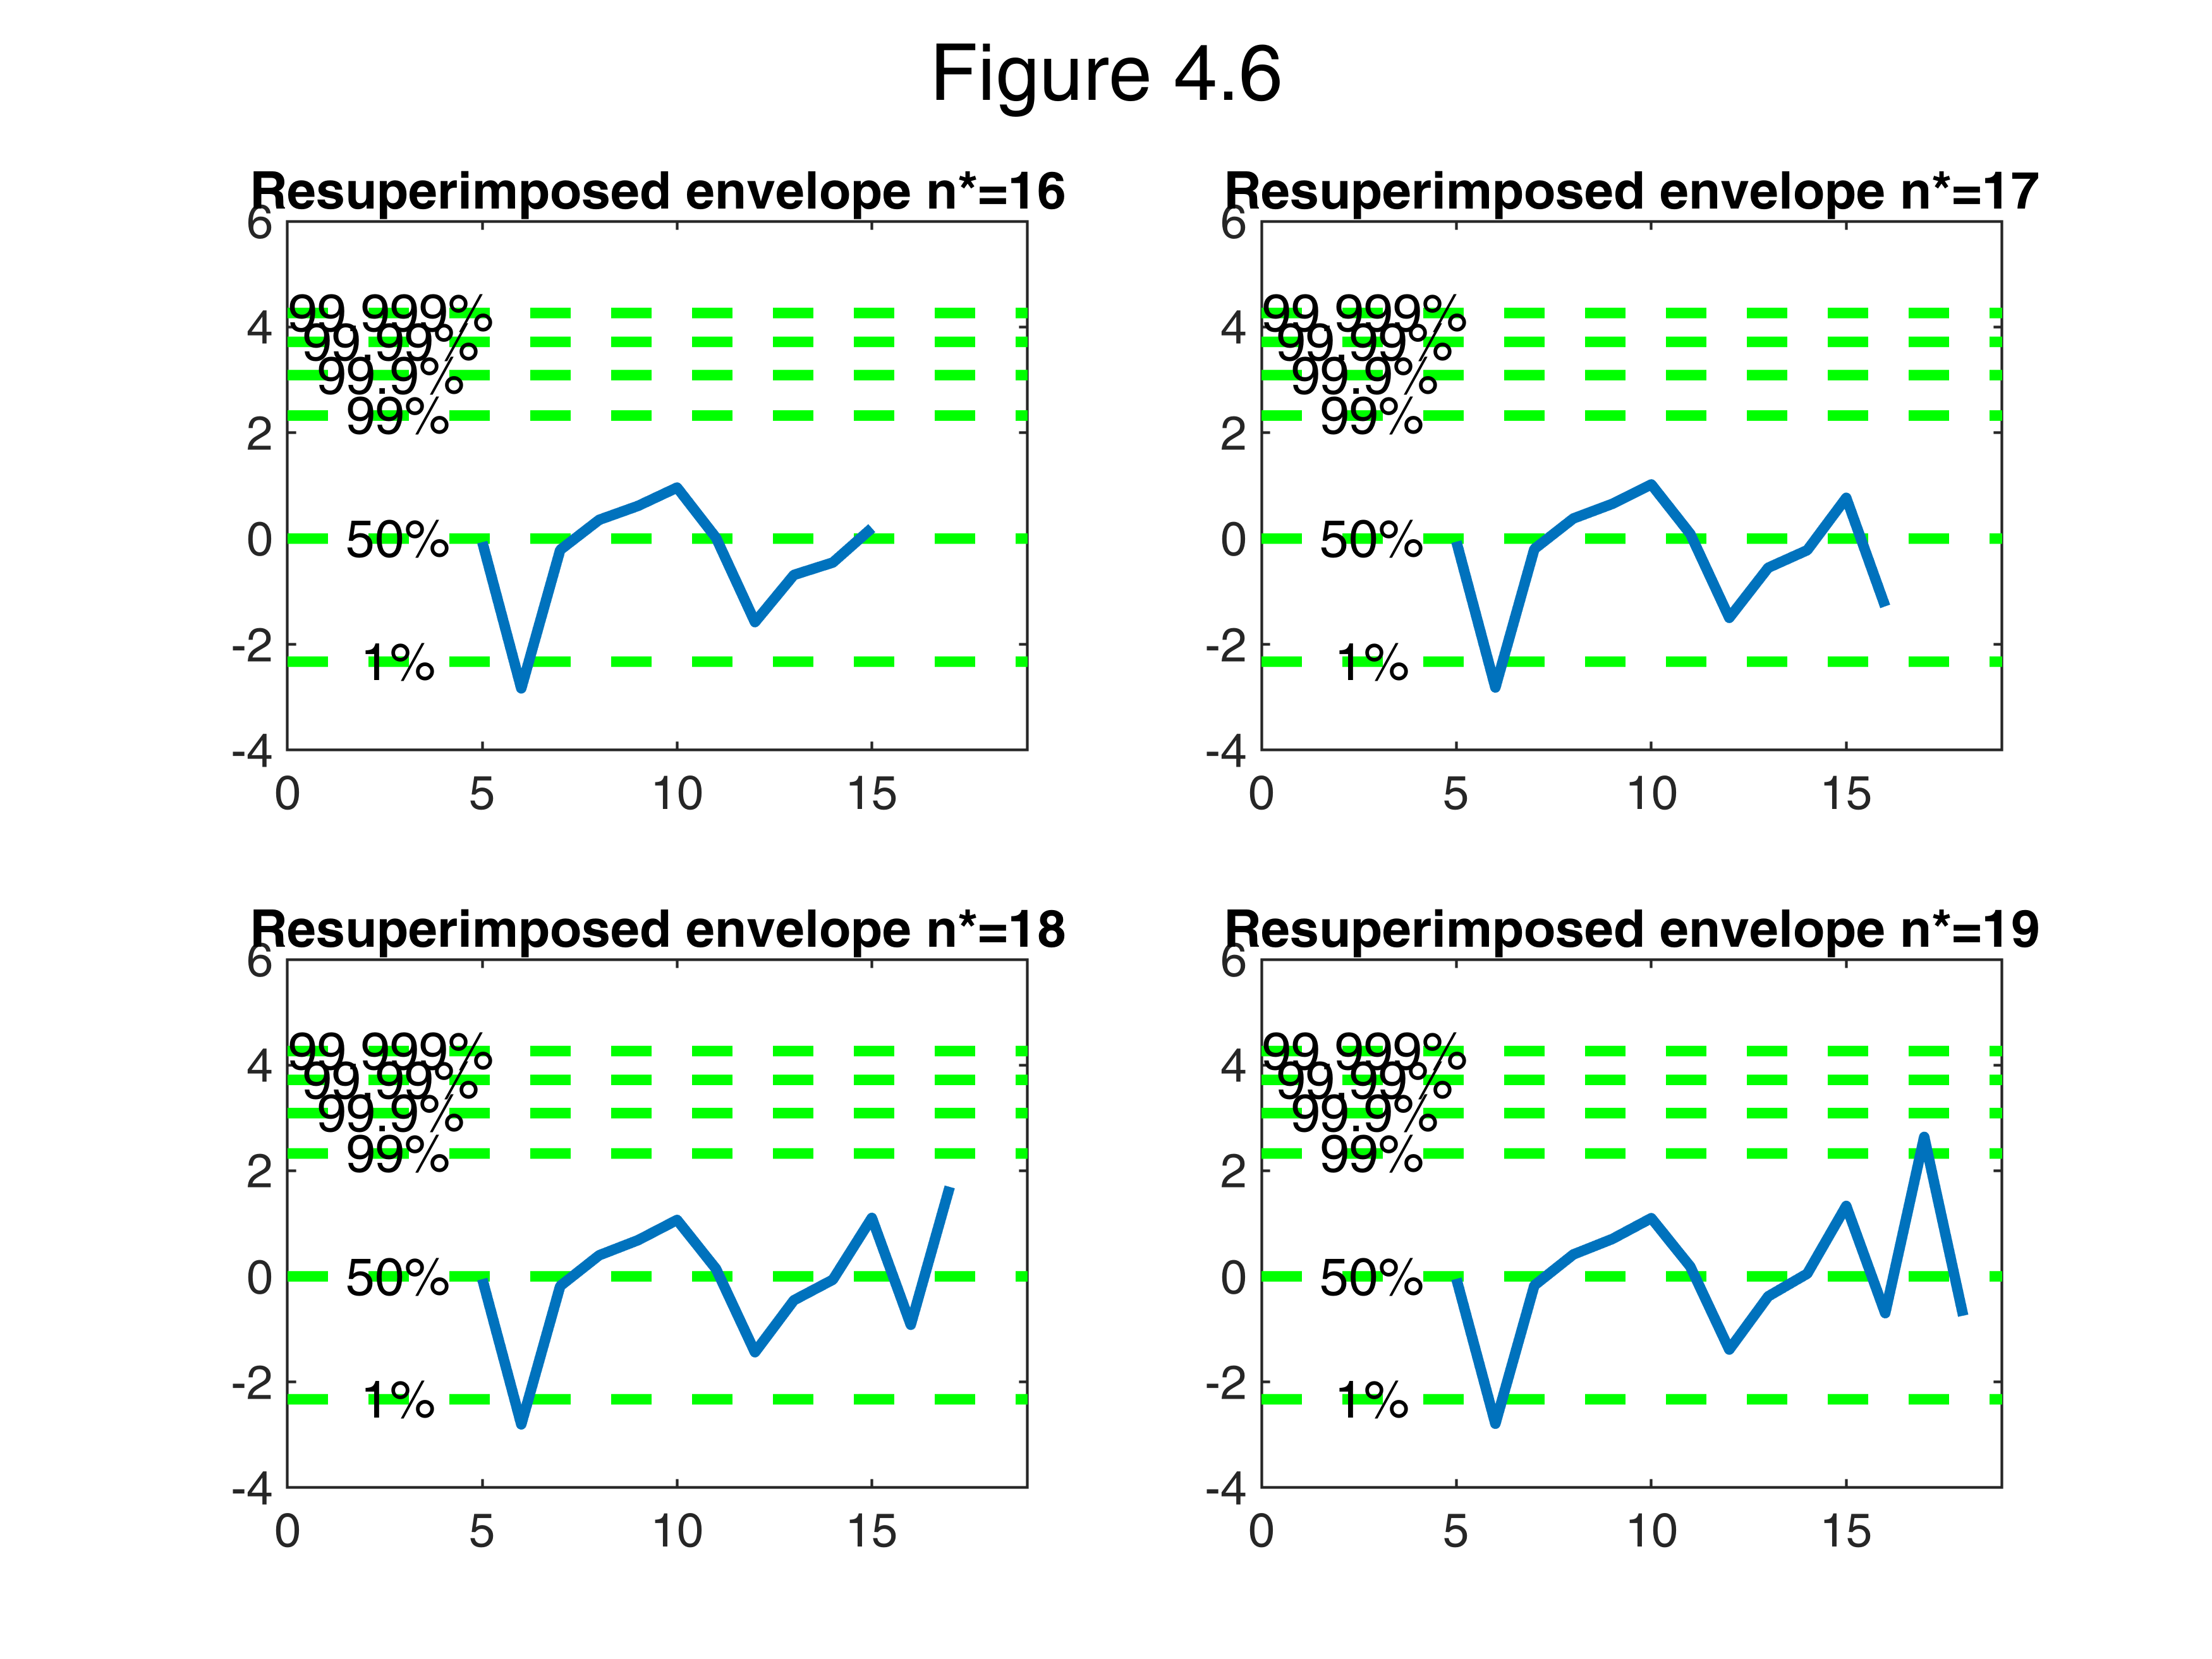

In [4]:
n0=16:19;
quantplo=[0.01 0.5 0.99 0.999 0.9999 0.99999];
ninv=norminv(quantplo);
lwdenv=2;
supn0=max(n0);

figure;
ij=0;
for jn0=n0
    ij=ij+1;
    [MDRinv] = FSRinvmdr(out.mdr,2,'n',jn0);
    % Plot for each step of the fwd search the values of mdr translated in
    % Plot for each step of the fwd search the values of mdr translated in
    % terms of normal quantiles
    subplot(2,2,ij)
    plot(MDRinv(:,1),norminv(MDRinv(:,2)),'LineWidth',2)
    xlim([0 supn0])
    v=axis;
    line(v(1:2)',[ninv;ninv],'color','g','LineWidth',lwdenv,'LineStyle','--','Tag','env');
    text(v(1)*ones(length(quantplo),1),ninv',strcat(num2str(100*quantplo'),'%'));
    line(MDRinv(:,1),norminv(MDRinv(:,2)),'LineWidth',2)
    title(['Resuperimposed envelope n*=' num2str(jn0)]);
end


if prin==1
    % print to postscript
    print -depsc WDresuperNC.eps;
end

sgtitle('Figure 4.6')
set(gcf,"Name",'Figure 4.6')

## Create Figure 4.7

In [5]:
[out]=FSR(y,X,'nsamp',50000,'plots',0);

Number of subsets to extract greater than (n p). It is set to (n p)
------------------------------
-------------------------
Signal detection loop
Tentative signal in central part of the search: step m=17 because
rmin(17,27)>99.999%
-------------------
Signal validation exceedance of upper envelopes
Validated signal
-------------------------------
Start resuperimposing envelopes from step m=16
Superimposition stopped because r_{min}(17,19)>99% envelope
 !!!EQ_1!!! \% envelope
Subsample of 18 units is homogeneous
----------------------------
Final output
Number of units declared as outliers=9
Summary of the exceedances
           1          99         999        9999       99999
           1           3           3           3           2


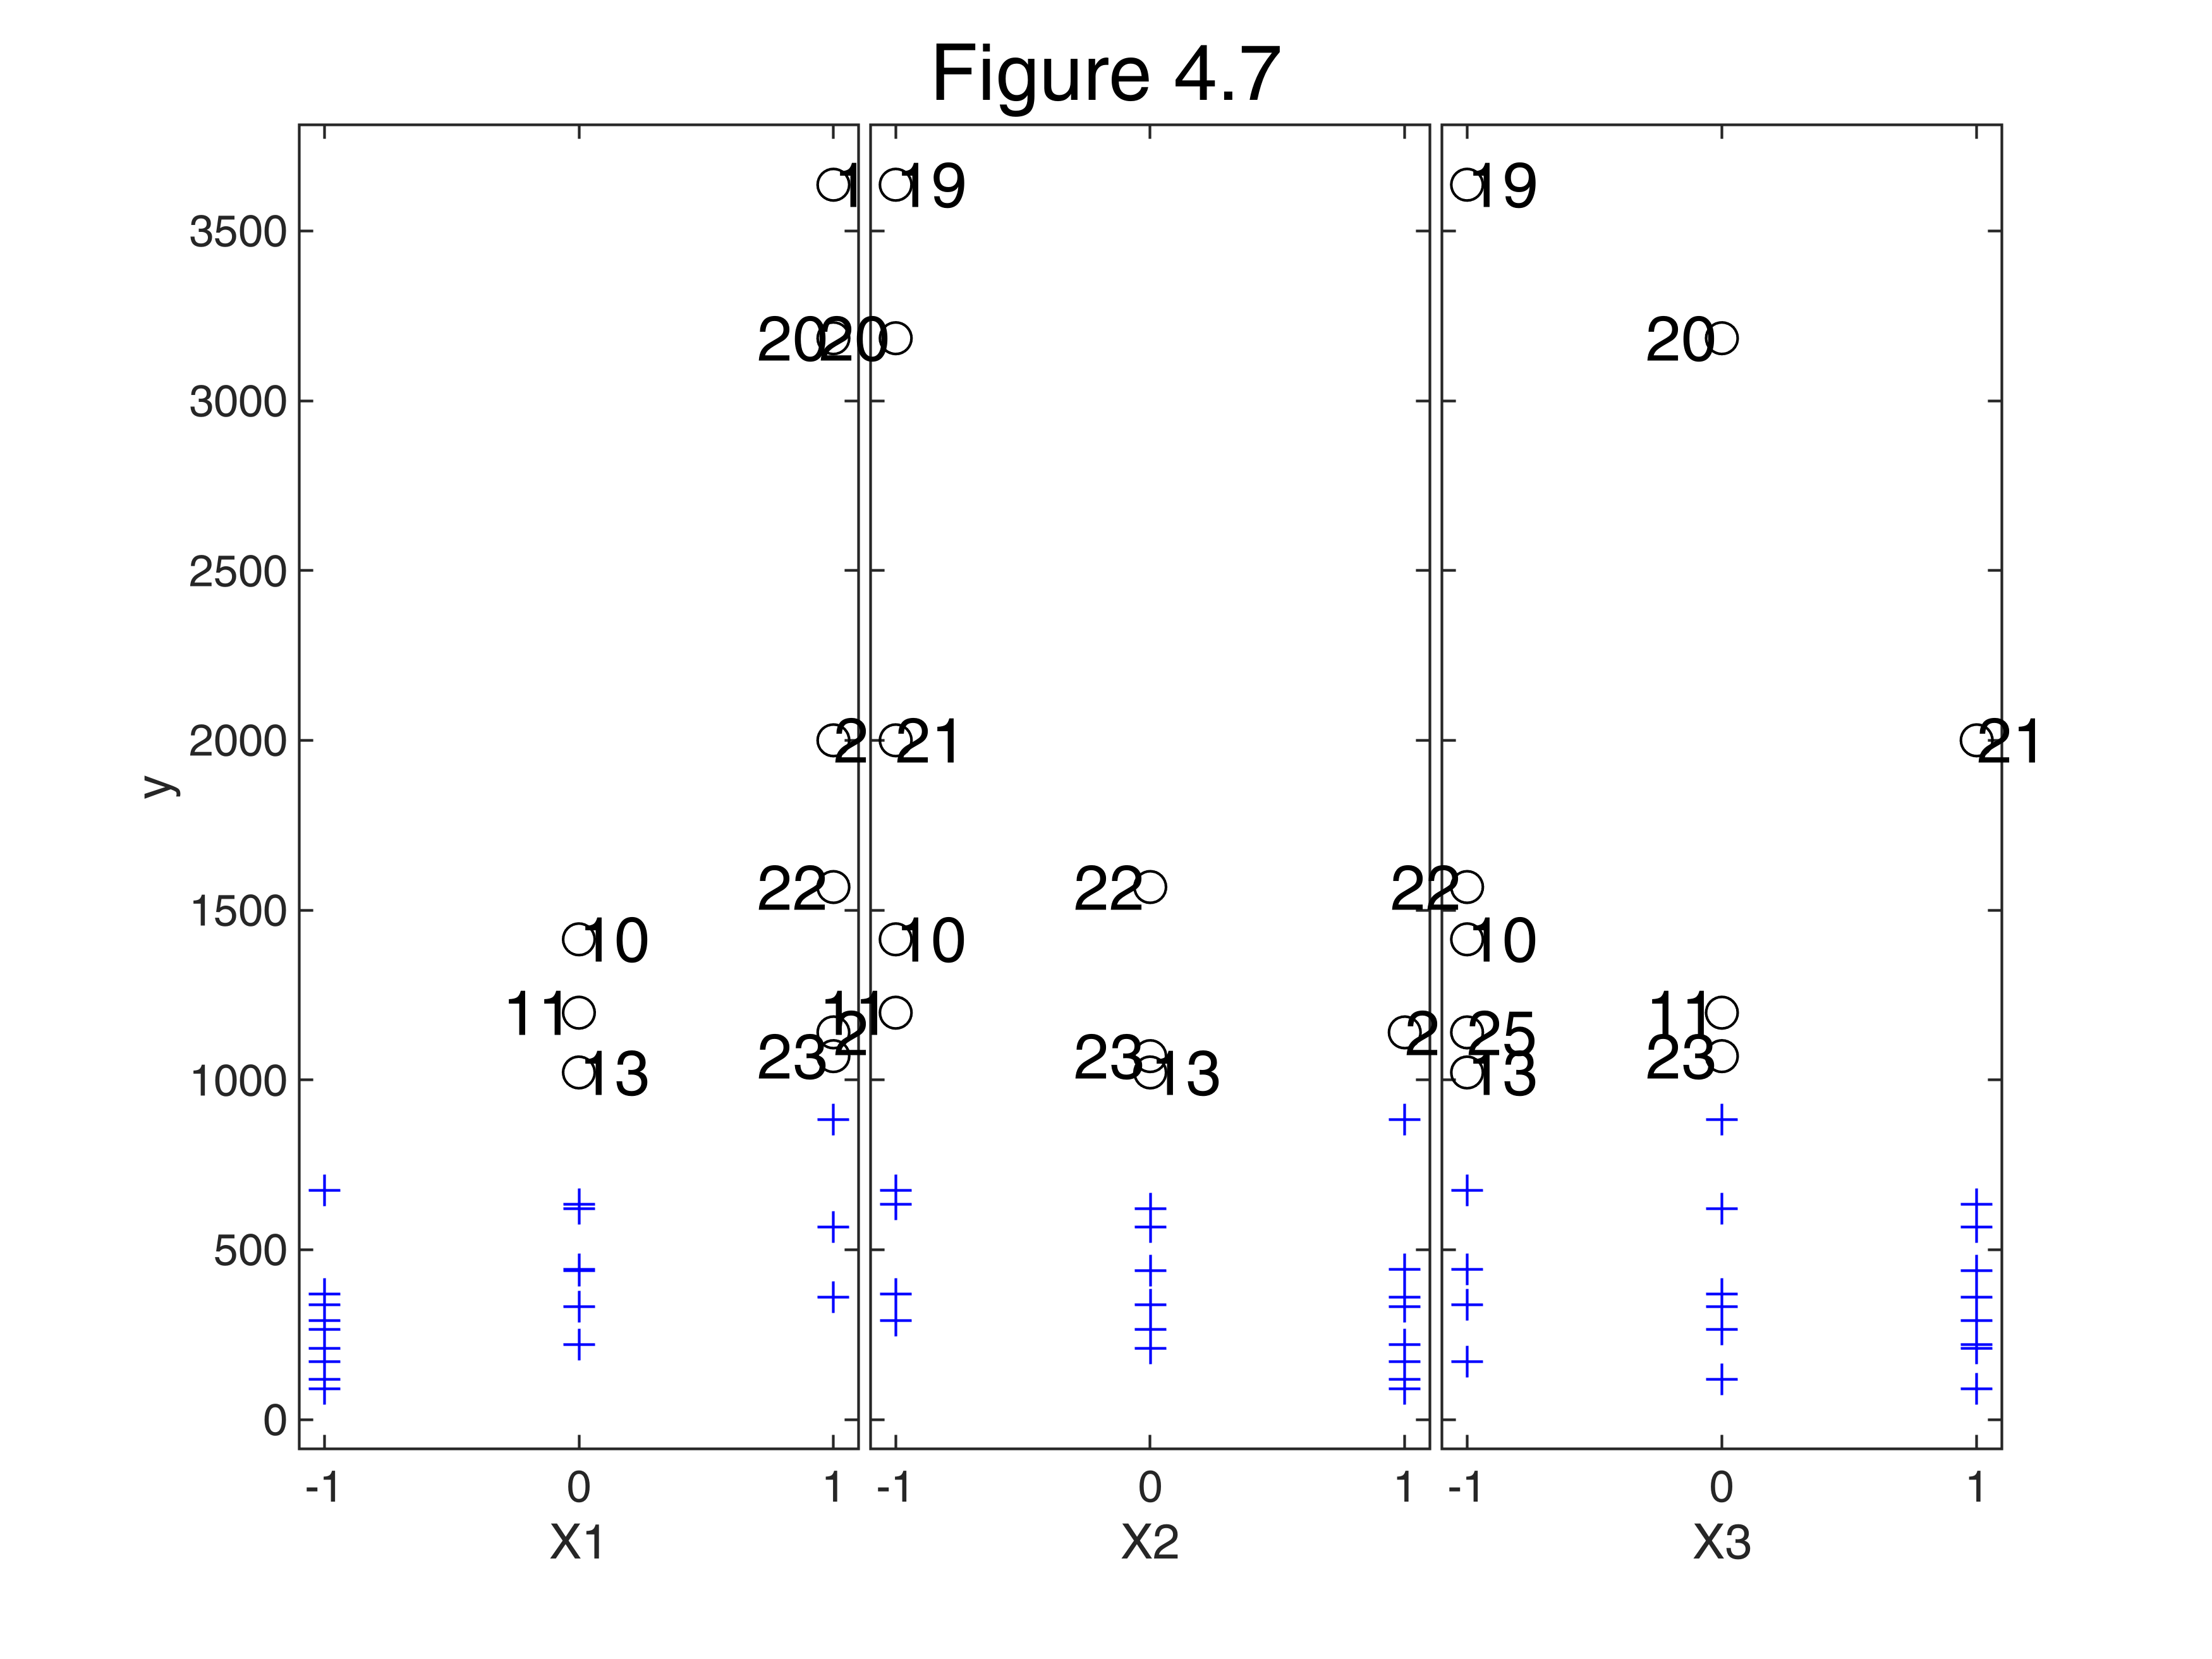

In [6]:
group=ones(length(y),1);
group(out.ListOut)=2;
plo=struct;
plo.clr='bk';
plo.sym='+o';
plo.labeladd = '1';
plo.namey='y';
plo.nameX={'X1' 'X2' 'X3'};
yXplot(y,X,group,plo);
legend off

if prin==1
    % print to postscript
    print -depsc wdscaFSR.eps;
end

sgtitle('Figure 4.7')
set(gcf,"Name",'Figure 4.7')

## Create Figure 4.8

log wool data, mdrplot in normal coordinates


In [7]:
[outT]=FSR(log(y),X,'nsamp',0,'plots',0);

------------------------------
-------------------------
Signal detection loop
Sample seems homogeneous, no outlier has been found
Summary of the exceedances
           1          99         999        9999       99999
           0           1           1           1           1


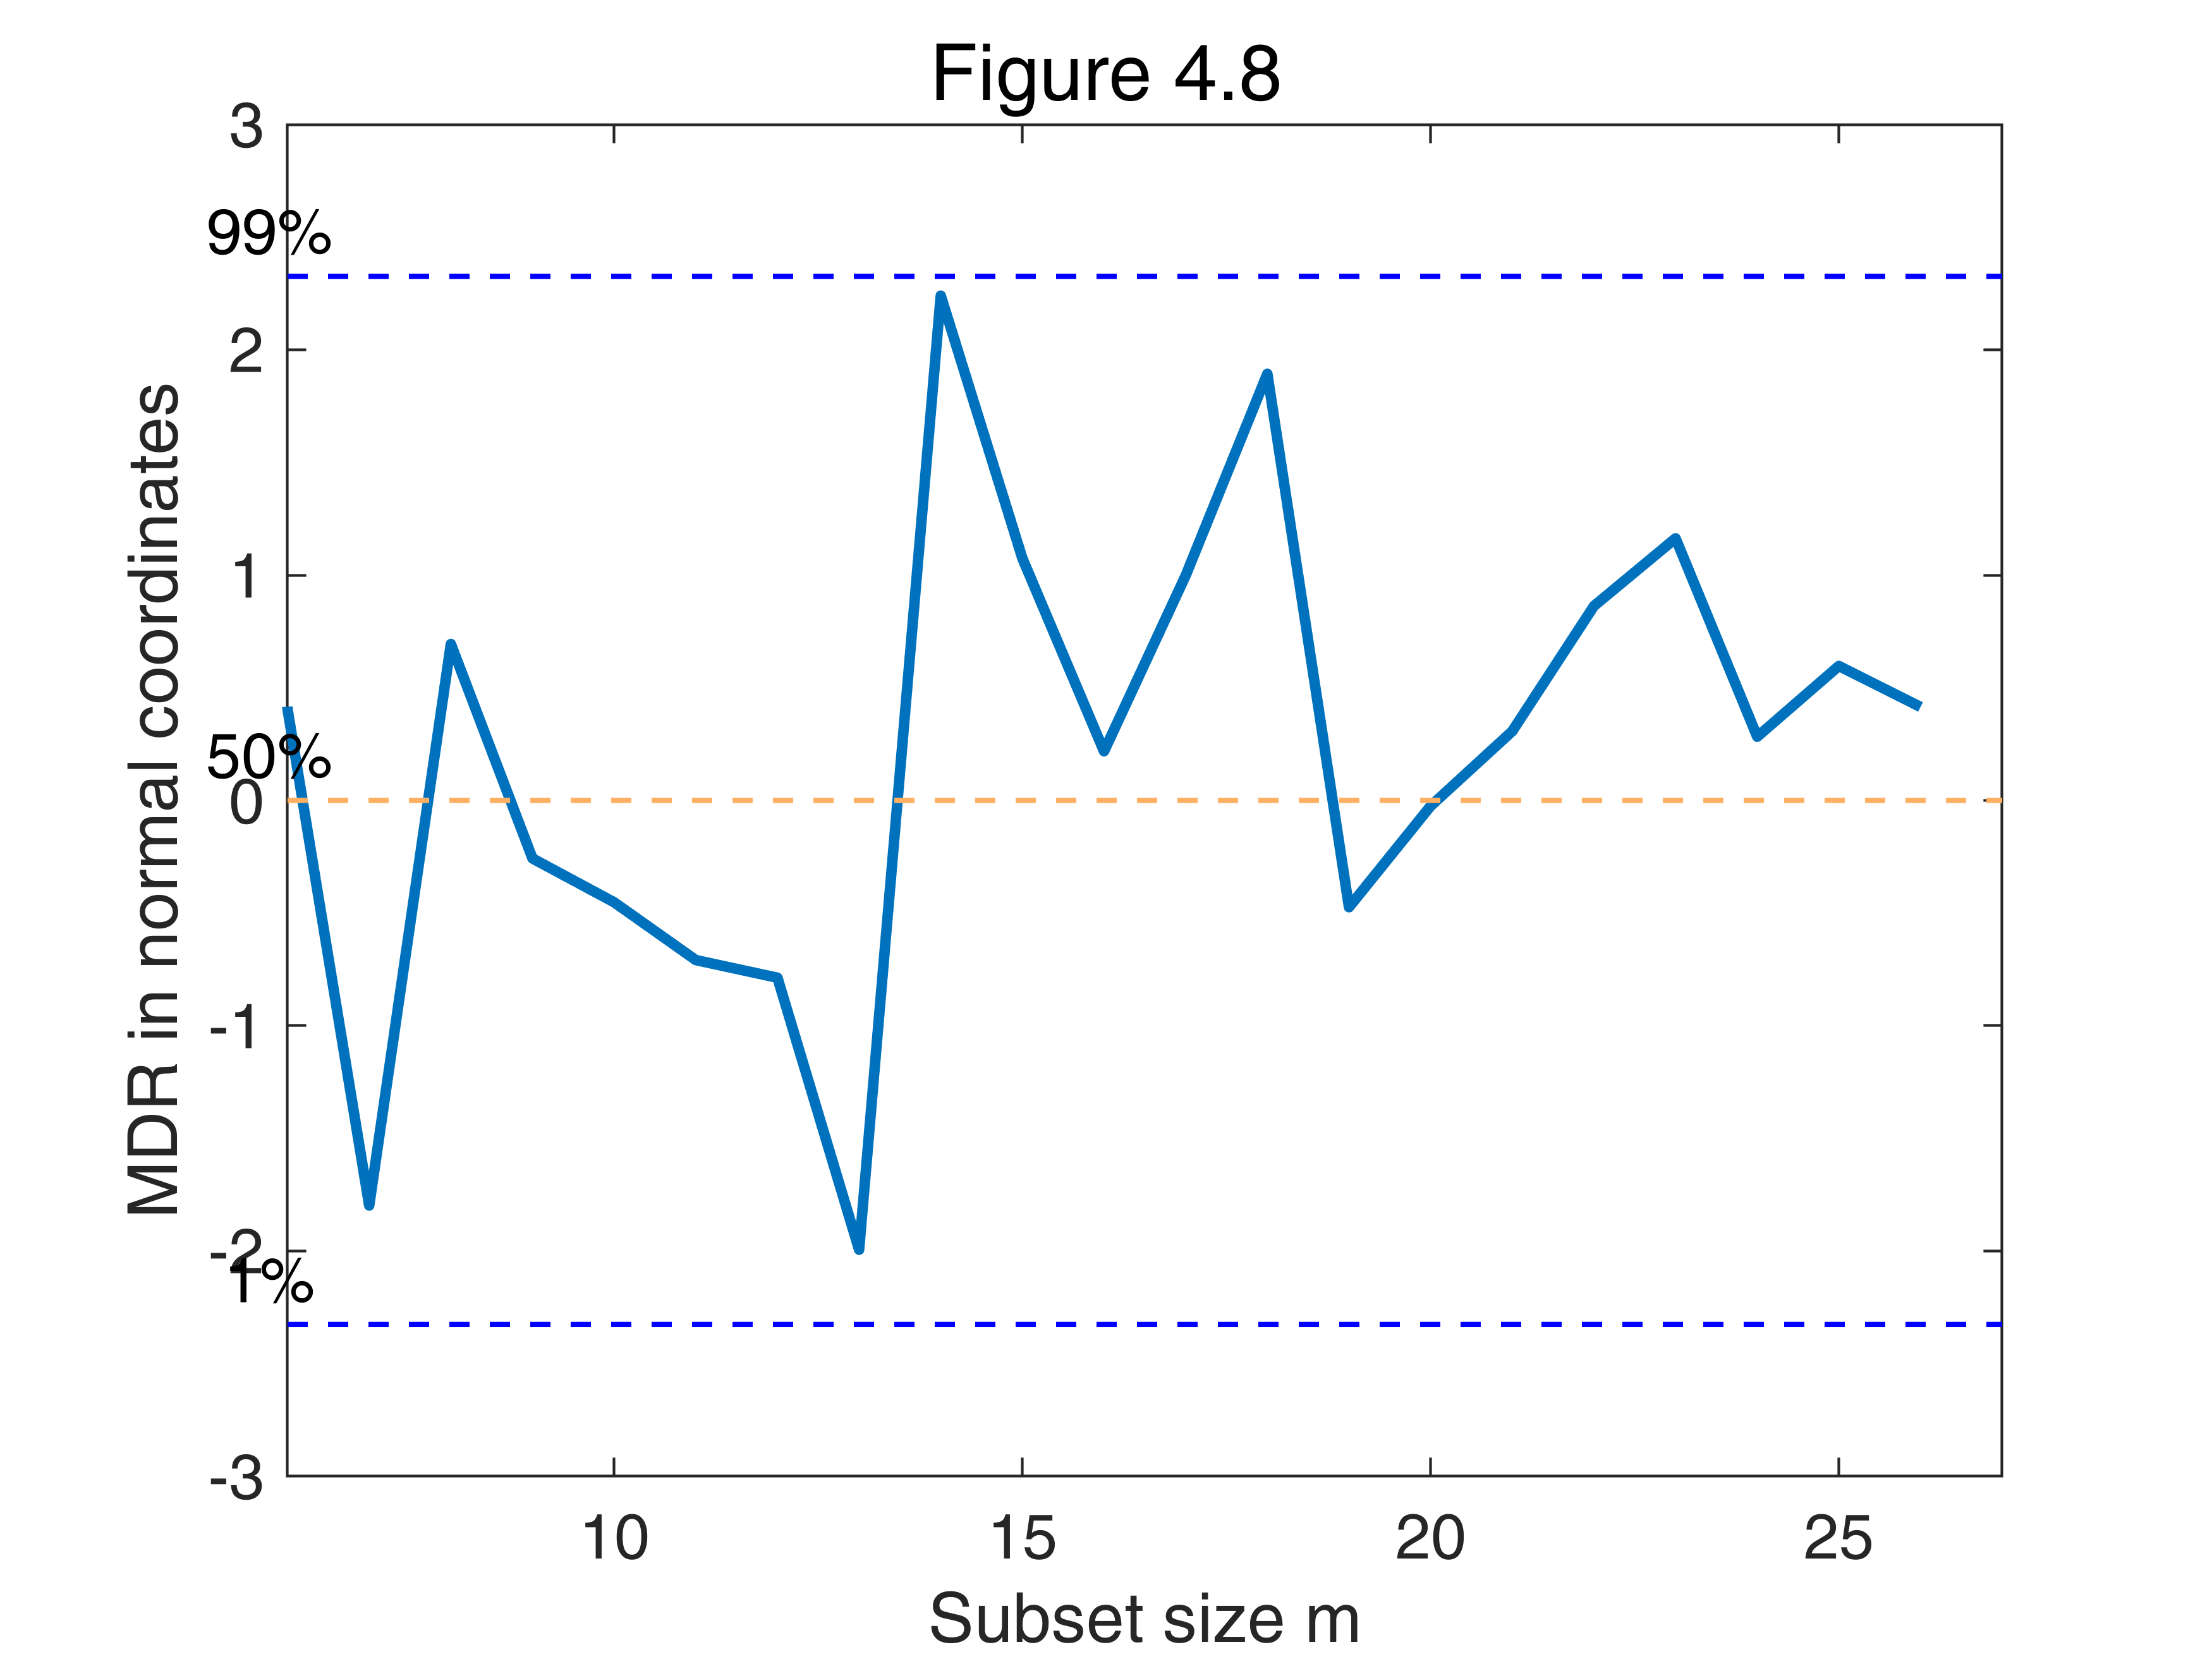

In [8]:
[mdrquant] = FSRinvmdr(abs(outT.mdr),4,'plots',1);
ylim([-3 3])
xlim([6 27])

if prin==1
    % print to postscript
    print -depsc figs\wdmdrlogyNC.eps;
end

sgtitle('Figure 4.8')
set(gcf,"Name",'Figure 4.8')

In [9]:

%InsideREADME